# CROP PRODUCTION ANALYSIS OF INDIAN STATES

In [1]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#reading csv file
df=pd.read_csv('Crop Production data.csv')

In [3]:
df.head() #Database

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
df.info()# Basic information of Database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [5]:
df['Crop_Year'] = pd.to_datetime(df['Crop_Year'], format='%Y')

In [6]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000-01-01,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000-01-01,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000-01-01,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000-01-01,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000-01-01,Whole Year,Cashewnut,720.0,165.0


In [7]:
df.shape # Finding how many Rows and Coloumns 

(246091, 7)

In [8]:
df.isnull().sum() # Looking for Null values

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

Almost less than 2% of data is null value so we can drop this rows

In [9]:
df.dropna(inplace=True)


In [10]:
df.isnull().sum()# checking again for null values

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

Now there is no null values in database

In [11]:
df.describe().round()

,Area,Production
count,242361.0,2.423610e+05
mean,12167.0,5.825030e+05
std,50857.0,1.706581e+07
min,0.0,0.000000e+00
25%,87.0,8.800000e+01
50%,603.0,7.290000e+02
75%,4545.0,7.023000e+03
max,8580100.0,1.250800e+09


In [12]:
crop_count=df['Crop'].unique()
district_count=df['District_Name'].unique()
statename_count=df['State_Name'].unique()
season_count=df['Season'].unique()
print("State count " +str(len(statename_count)) +'  district_count '+ str(len(district_count)) + '    crop_count '+str(len(crop_count)) +'  Season_count  '+ str(len(season_count)))

State count 33  district_count 646    crop_count 124  Season_count  6


In [13]:
crop_year=df['Crop_Year'].unique()
crop_year

array(['2000-01-01T00:00:00.000000000', '2001-01-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '2004-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '1997-01-01T00:00:00.000000000', '1998-01-01T00:00:00.000000000',
       '1999-01-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', '2012-01-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [14]:
df = df.replace({'Season': {'Kharif     ' : 'Kharif', 'Whole Year ': 'Whole Year','Autumn     ':'Autumn','Rabi       ':'Rabi','Summer     ':'Summer','Winter     ':'Winter'}})


In [15]:
categories = {
    'Cereals': ['Rice', 'Maize', 'Bajra', 'Jowar', 'Korra', 'Ragi', 'Wheat', 'Barley', 'Small millets', 'Other Cereals & Millets', 'Paddy'],
    'Pulses': ['Other Kharif pulses', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Gram', 'Masoor', 'other misc. pulses', 'Other Rabi pulses', 'Cowpea(Lobia)', 'Peas (vegetable)', 'Peas & beans (Pulses)', 'Blackgram', 'Lentil', 'Bean', 'Rajmash Kholar', 'Ricebean (nagadal)', 'Horse-gram', 'Pulses total', 'Moth', 'Khesari'],
    'Oilseeds': ['Groundnut', 'Sunflower', 'Castor seed', 'other oilseeds', 'Sesamum', 'Linseed', 'Safflower', 'Soyabean', 'Niger seed', 'Rapeseed & Mustard', 'Oilseeds total', 'Guar seed'],
    'Fruits': ['Banana', 'Grapes', 'Mango', 'Orange', 'Other Fresh Fruits', 'Papaya', 'Pome Fruit', 'Lemon', 'Pome Granet', 'Sapota', 'Apple', 'Peach', 'Pear', 'Plums', 'Litchi', 'Ber', 'Water Melon', 'Citrus Fruit', 'Other Citrus Fruit', 'Pineapple'],
    'Vegetables': ['Sweet potato', 'Tapioca', 'Onion', 'Potato', 'Beans & Mutter(Vegetable)', 'Bhindi', 'Brinjal', 'Cucumber', 'Tomato', 'Cabbage', 'Bottle Gourd', 'Bitter Gourd', 'Drum Stick', 'Jack Fruit', 'Snak Guard', 'Pump Kin', 'Cauliflower', 'Turnip', 'Carrot', 'Redish', 'Ash Gourd', 'Beet Root', 'Lab-Lab', 'Ribed Guard', 'Yam', 'Other Vegetables', 'Colocosia'],
    'Spices': ['Dry ginger', 'Turmeric', 'Black pepper', 'Dry chillies', 'Garlic', 'Ginger', 'Cardamom', 'Coriander', 'Cond-spcs other'],
    'Fibers': ['Cotton(lint)', 'Jute', 'Mesta', 'Jute & mesta', 'other fibres', 'Kapas'],
    'Nuts': ['Arecanut', 'Cashewnut', 'Arcanut (Processed)', 'Atcanut (Raw)', 'Cashewnut Processed', 'Cashewnut Raw', 'Other Dry Fruit'],
    'Plantation Crops': ['Coconut', 'Rubber', 'Tea', 'Coffee'],
    'Cash Crops': ['Sugarcane', 'Tobacco'],
    'Others': ['Sannhamp', 'Varagu', 'Jobster', 'Perilla', 'Total foodgrain']
}


In [16]:
def Categories_crop(crop):
    for category, crops in categories.items():
        if crop in crops:
            return category
        

In [17]:
df['Crop_Category']=df['Crop'].apply(Categories_crop)

In [18]:
df.dropna(inplace=True)

In [19]:
data_cross=pd.crosstab(df['State_Name'],df['Crop_Category'])

## 1.TOTAL PRODUCTION BY STATE

In [20]:
state_production=df.groupby('State_Name')['Production'].sum().sort_values(ascending=False)

print(state_production.head(10))


State_Name
Uttar Pradesh     3.222527e+09
Maharashtra       1.263079e+09
Tamil Nadu        1.138619e+09
Karnataka         8.065480e+08
West Bengal       6.733628e+08
Punjab            5.855870e+08
Andhra Pradesh    5.184313e+08
Gujarat           5.183310e+08
Madhya Pradesh    4.361407e+08
Haryana           3.703921e+08
Name: Production, dtype: float64


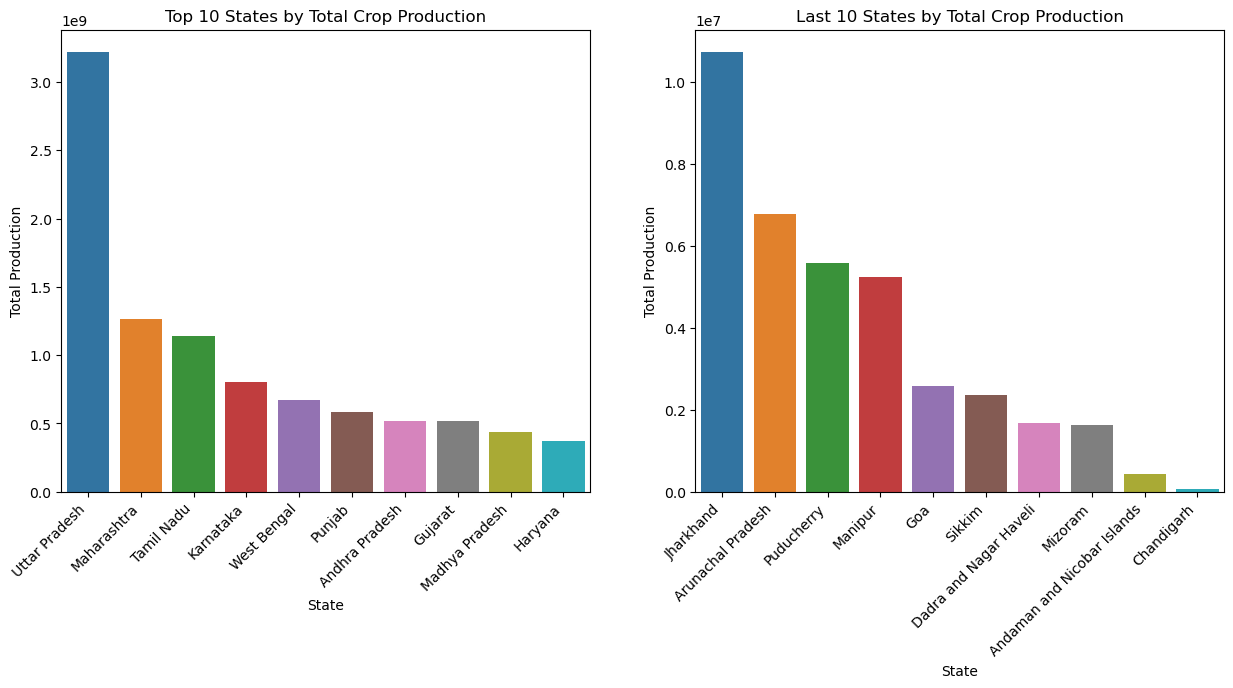

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=state_production.head(10).index, y=state_production.head(10).values)
plt.title('Top 10 States by Total Crop Production')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.xticks(rotation=45,ha='right')

plt.subplot(1,2,2)
sns.barplot(x=state_production.tail(10).index, y=state_production.tail(10).values)
plt.title('Last 10 States by Total Crop Production')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.xticks(rotation=45,ha='right')
plt.show()

In [22]:
total_production=state_production.sum()
state_production_percentage=((state_production/total_production)*100).round(2)


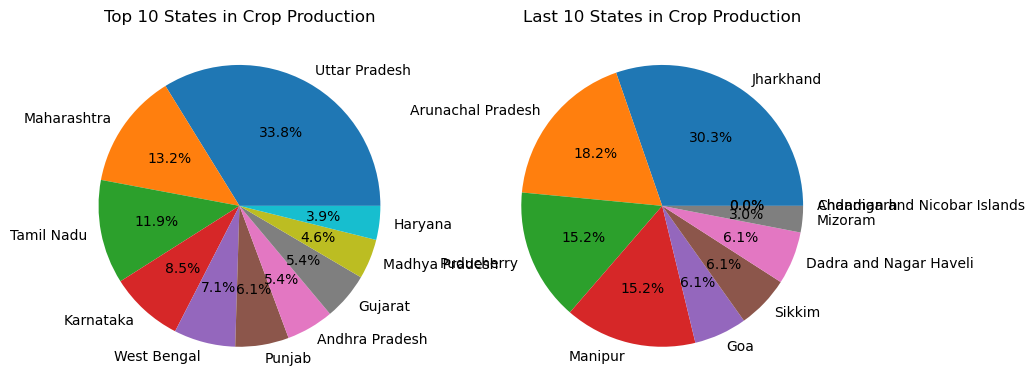

In [23]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.pie(state_production_percentage.head(10).values,labels=state_production_percentage.head(10).index,autopct='%1.1f%%')
plt.title('Top 10 States in Crop Production')


plt.subplot(122)
plt.pie(state_production_percentage.tail(10).values,labels=state_production_percentage.tail(10).index,autopct='%1.1f%%')
plt.title('Last 10 States in Crop Production')
plt.show()

<b>The top three states in terms of crop production are:</b> <br>
Uttar Pradesh: 33.8%<br>
Maharashtra: 13.2% <br>
Tamil Nadu: 11.9%<br>
<b>The last three states in terms of crop production are:</b><br>
Chandigarh<br>
Andaman and Nicobar<br>
Mizoram<br>

In [24]:
df_UttarPradesh=df[df['State_Name']=='Uttar Pradesh']

In [25]:
df_UttarPradesh

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Crop_Category
198276,Uttar Pradesh,AGRA,1997-01-01,Kharif,Arhar/Tur,6538.0,9664.0,Pulses
198277,Uttar Pradesh,AGRA,1997-01-01,Kharif,Bajra,99898.0,147994.0,Cereals
198278,Uttar Pradesh,AGRA,1997-01-01,Kharif,Groundnut,27.0,22.0,Oilseeds
198279,Uttar Pradesh,AGRA,1997-01-01,Kharif,Jowar,725.0,406.0,Cereals
198280,Uttar Pradesh,AGRA,1997-01-01,Kharif,Maize,138.0,316.0,Cereals
...,...,...,...,...,...,...,...,...
231577,Uttar Pradesh,VARANASI,2014-01-01,Rabi,Wheat,68617.0,127010.0,Cereals
231578,Uttar Pradesh,VARANASI,2014-01-01,Summer,Maize,59.0,105.0,Cereals
231579,Uttar Pradesh,VARANASI,2014-01-01,Summer,Moong(Green Gram),61.0,36.0,Pulses
231580,Uttar Pradesh,VARANASI,2014-01-01,Summer,Onion,169.0,2382.0,Vegetables


In [26]:
df_UttarPradesh_group=df_UttarPradesh.groupby('Crop_Category')['Crop'].count().sort_values(ascending=False)

<Axes: xlabel='Crop_Category'>

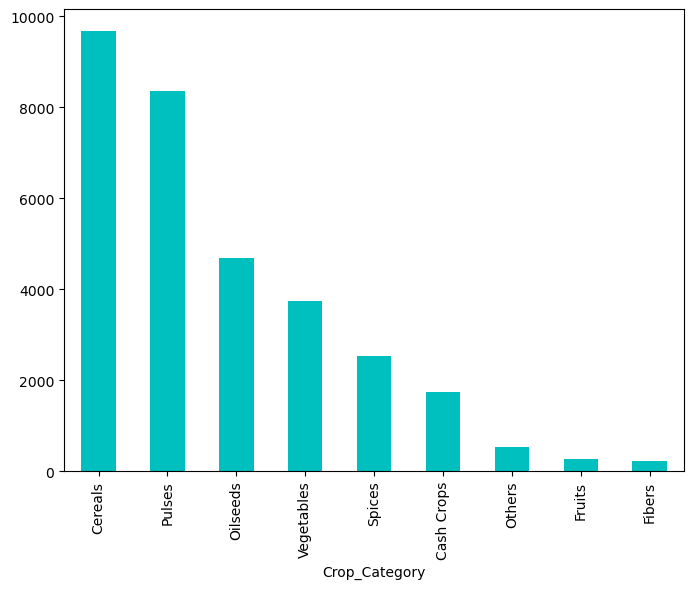

In [27]:
plt.figure(figsize=(8,6))
df_UttarPradesh_group.plot(kind='bar',stacked=True,color='c')

In Uttar Pardesh most Crop production in Categroy of Cereals.

# 2. Top 10 Crop Production in all Year

In [28]:
Crop_Production=df.groupby('Crop')['Production'].sum().sort_values(ascending=False)

In [29]:
total_crop_production=Crop_Production.sum()
Crop_production_percentage=((Crop_Production/total_crop_production)*100).round(2)
print(Crop_production_percentage.head(10))

Crop
Sugarcane       49.88
Rice            14.47
Wheat           12.01
Potato           3.83
Cotton(lint)     2.68
Maize            2.46
Jute             1.64
Banana           1.32
Soyabean         1.28
Bajra            1.17
Name: Production, dtype: float64


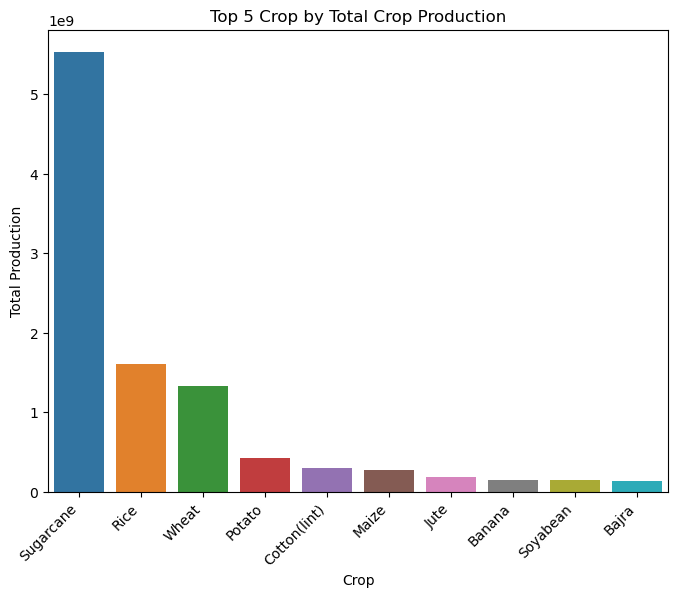

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(x=Crop_Production.head(10).index, y=Crop_Production.head(10).values)
plt.title('Top 5 Crop by Total Crop Production')
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.xticks(rotation=45,ha='right')
plt.show()

Sugarcane is by far the most produced crop, accounting for about 49% of the total production.<br>
The top 5 crops sugarcane, rice, wheat, potato and cotton

# 3. Total crop production changed over the years for the entire state

In [31]:
df_year=df.groupby(by='Crop_Year')['Area'].mean()
df_year

Crop_Year
1997-01-01    26660.260545
1998-01-01    14952.138498
1999-01-01    12807.649336
2000-01-01    12461.725483
2001-01-01    12635.255791
2002-01-01     9579.742579
2003-01-01     9922.616523
2004-01-01    12147.475568
2005-01-01    12048.679712
2006-01-01    12306.896900
2007-01-01    10788.081678
2008-01-01    12089.752073
2009-01-01    12126.078765
2010-01-01    12925.143157
2011-01-01    11332.691027
2012-01-01    11690.300898
2013-01-01    10671.105765
2014-01-01    10887.274530
2015-01-01     8675.485822
Name: Area, dtype: float64

Text(0.5, 1.0, 'Total Crop Production over years of entire State')

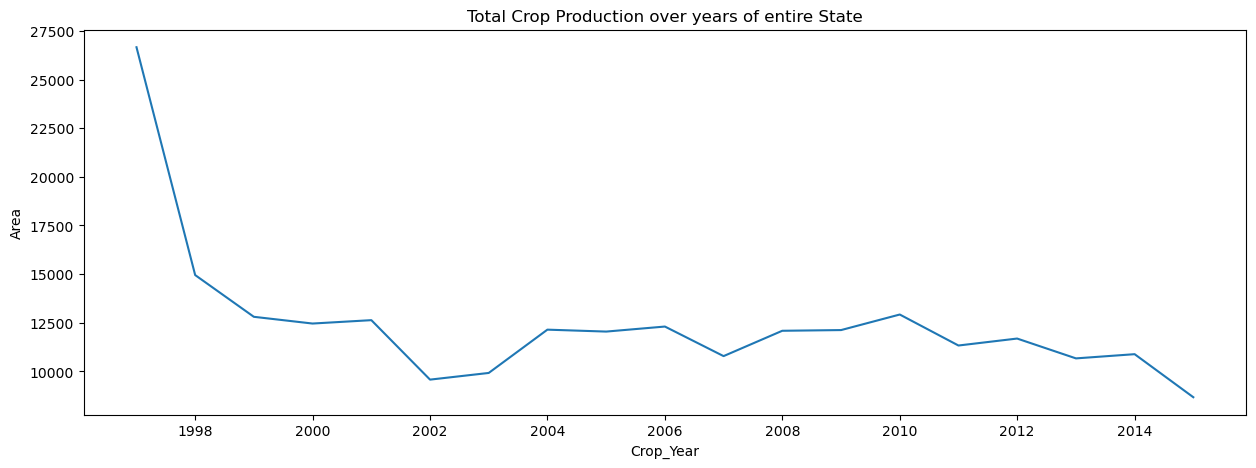

In [32]:
plt.figure(figsize=(15,5))
sns.lineplot(df_year)
plt.title('Total Crop Production over years of entire State')


Between 1997 and 2001, there is a sharp decline in the area used for crop production.<br>
From 2001 to 2015, the area shows fluctuations with periods of both increase and decrease, but the overall trend remains downward.<br>


# 4. Area wise production of different Crops Category

In [33]:
df_CropCategory_Area=df.groupby('Crop_Category')['Area'].mean().sort_values(ascending=False)
df_CropCategory_Area

Crop_Category
Cereals             26674.746793
Fibers              22749.426204
Plantation Crops    12338.701031
Others              10473.267266
Oilseeds            10354.307488
Cash Crops           7944.888642
Pulses               6850.696147
Nuts                 4435.015527
Vegetables           1545.159294
Fruits               1458.026000
Spices               1189.431820
Name: Area, dtype: float64

Text(0, 0.5, 'Area')

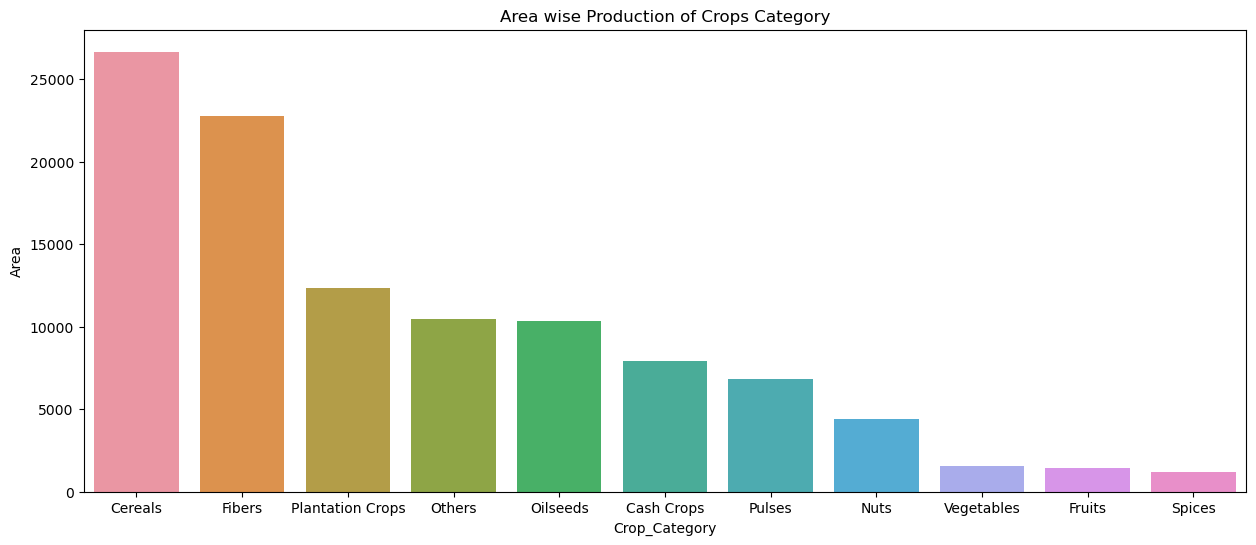

In [34]:
plt.figure(figsize=(15,6))
sns.barplot(x=df_CropCategory_Area.index,y=df_CropCategory_Area.values)
plt.title('Area wise Production of Crops Category')
plt.ylabel('Area')

Cereals have the highest production area, significantly higher than any other crop category.

# 5. States Wise distribution of Crop Category

Text(0.5, 1.0, 'State wise Distribution of Crop Category')

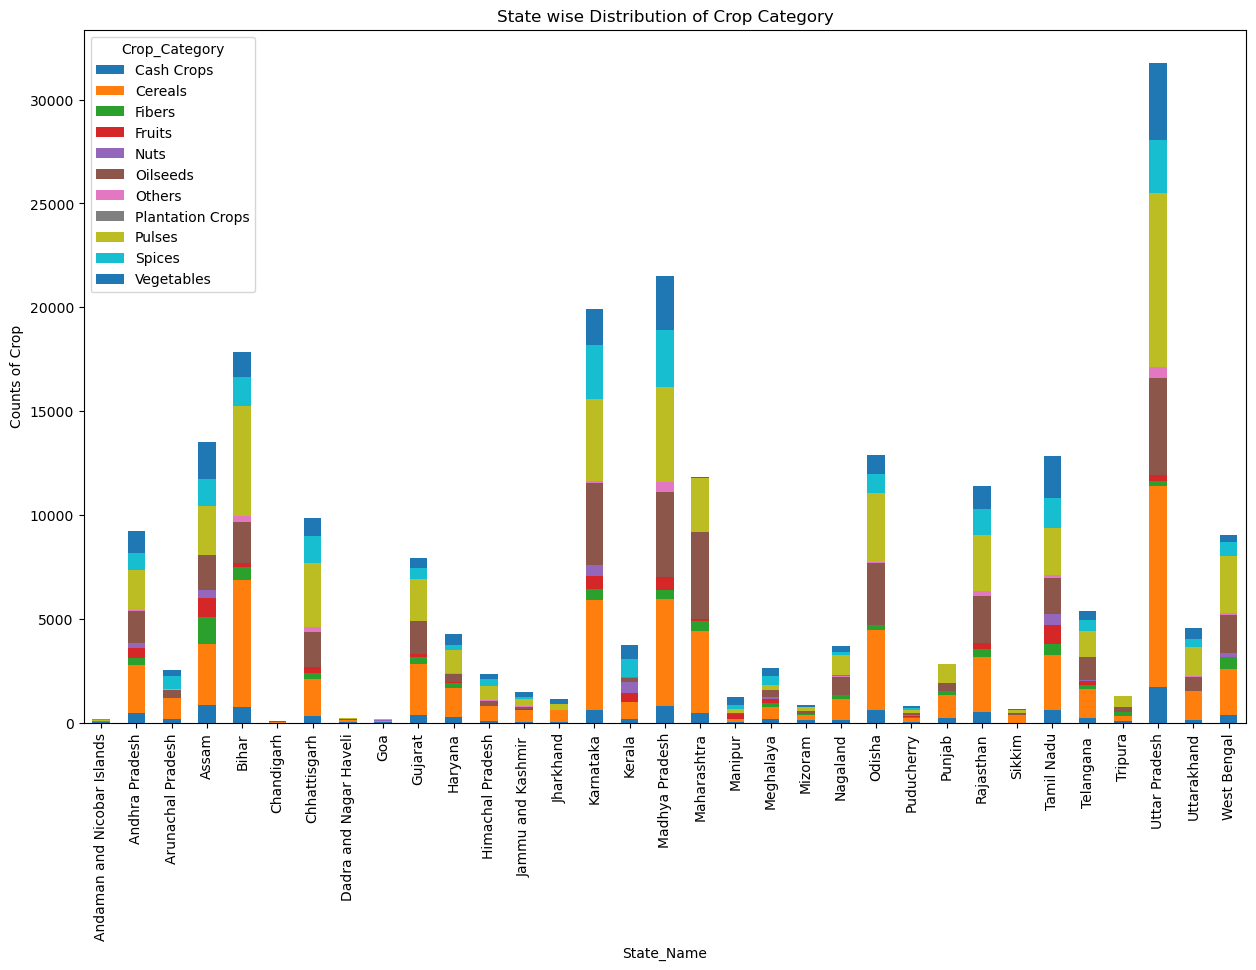

In [35]:
data_cross.plot(kind='bar',stacked=True,figsize = (15,9));
plt.ylabel('Counts of Crop')
plt.title('State wise Distribution of Crop Category')

Uttar Pradesh has the highest overall crop production area, followed by states like Madhya Pradesh and karnataka.<br>
Cereals are a major crop in most states, especially in states like Uttar Pradesh, West Bengal, and Madhya Pradesh.<br>
Dadra and Nagar Haveli, Goa, and Chandigarh have relatively lower overall crop production areas.

# 6. Season wise Production of Crops

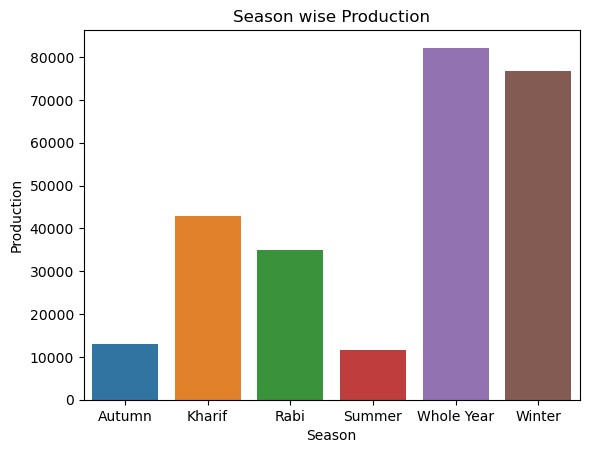

In [36]:
df_seasonal=df.groupby('Season')['Production'].mean()
sns.barplot(x=df_seasonal.index,y=df_seasonal.values)
plt.title('Season wise Production')
plt.ylabel('Production')
plt.show()

Whole Year season have the highest production followed by winter and kharif.

# 7. Top 5 and Last 5 District in Crop Production

In [37]:
df_district=df.groupby('District_Name')['Production'].sum().sort_values(ascending=False)

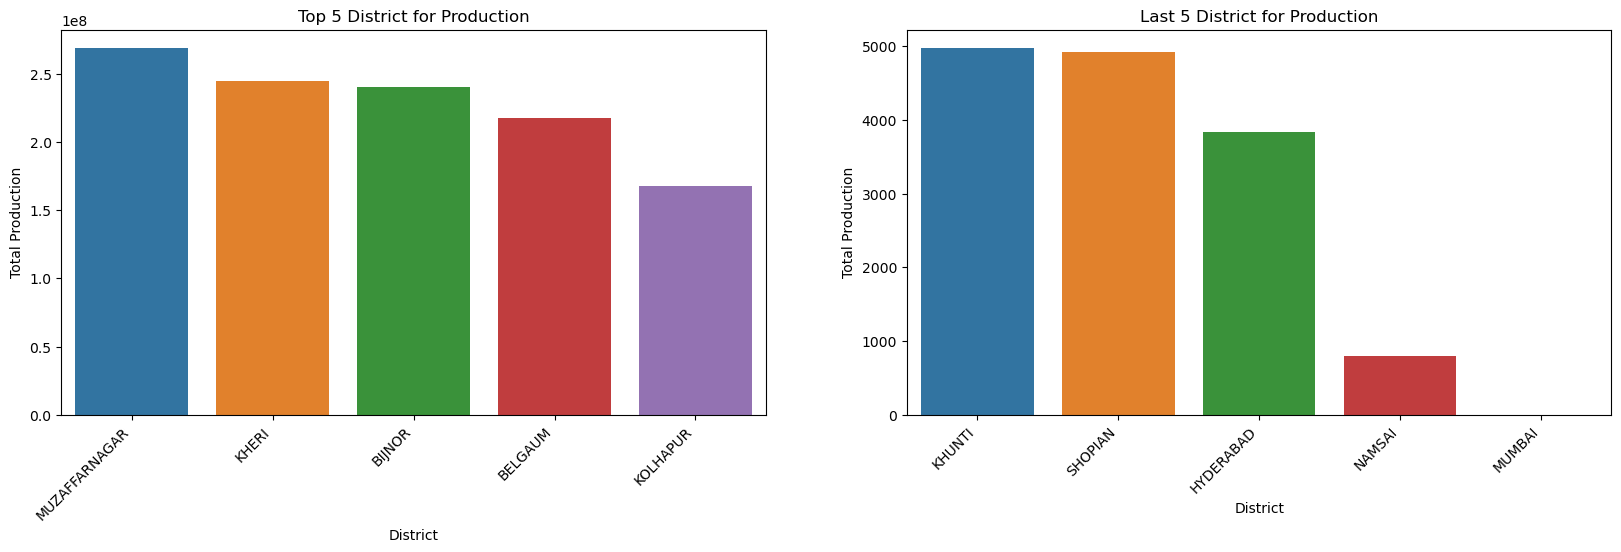

In [38]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(x=df_district.head().index, y=df_district.head().values)
plt.title('Top 5 District for Production')
plt.xlabel('District')
plt.ylabel('Total Production')
plt.xticks(rotation=45,ha='right')

plt.subplot(1,2,2)
sns.barplot(x=df_district.tail().index, y=df_district.tail().values)
plt.title('Last 5 District for Production')
plt.xlabel('District')
plt.ylabel('Total Production')
plt.xticks(rotation=45,ha='right')
plt.show()

Muzaffarnagar district is the most prominent in crop production and Mumbai is last district for crop production

# 8. Crop Category Production over Years

In [39]:
df_CropYear=pd.crosstab(pd.to_datetime(df['Crop_Year'],format='%Y'),df['Crop_Category'])
df_CropYear

Crop_Category,Cash Crops,Cereals,Fibers,Fruits,Nuts,Oilseeds,Others,Plantation Crops,Pulses,Spices,Vegetables
Crop_Year,,,,,,,,,,,
1997-01-01,410,3017,306,96,111,1420,147,0,1850,531,552
1998-01-01,553,3236,388,123,114,2025,154,0,2371,868,818
1999-01-01,604,3314,436,142,101,2255,127,6,2609,1179,979
2000-01-01,609,3656,472,183,140,2298,151,8,2986,1297,946
2001-01-01,622,3546,437,134,121,2287,115,32,3011,1230,970
2002-01-01,650,3698,424,1302,222,2353,176,34,3048,1329,2447
2003-01-01,609,3799,423,1466,159,2423,191,9,3330,1340,2568
2004-01-01,592,3754,420,189,127,2508,119,0,2721,1432,1192
2005-01-01,632,3494,424,214,171,2288,124,0,2922,1256,1246


Text(0, 0.5, 'Crop Count')

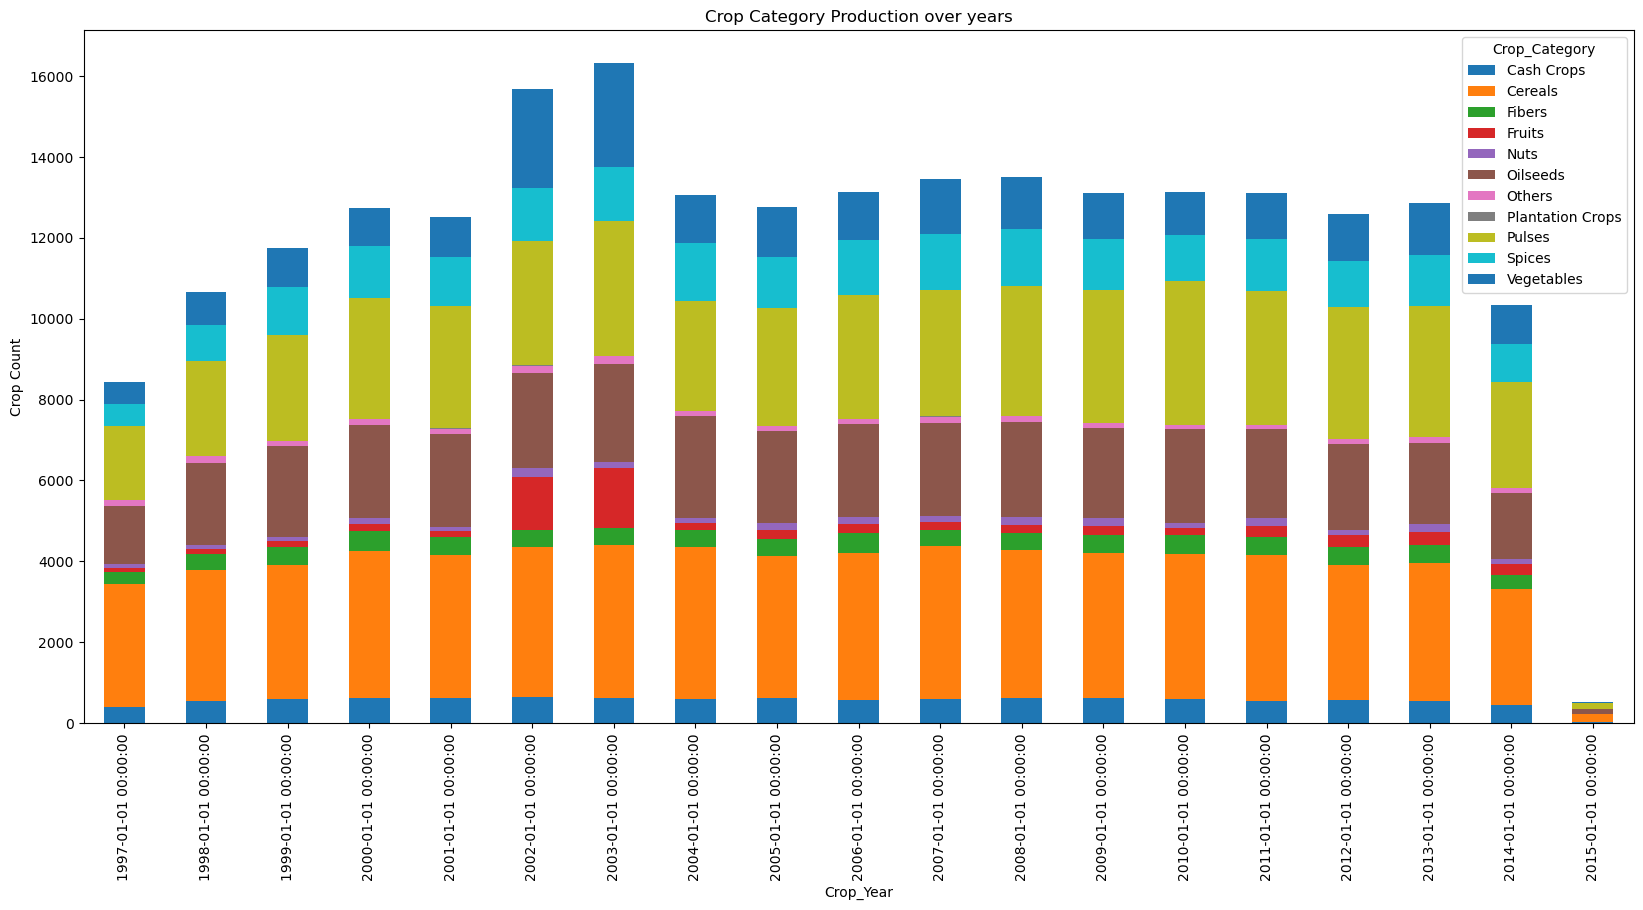

In [40]:
df_CropYear.plot(kind='bar',stacked=True,figsize = (20,9))
plt.title('Crop Category Production over years')
plt.ylabel('Crop Count')



Crop production increased from 1997 to around 2003, remained relatively high and stable until around 2013, and then dropped sharply in 2015.
<br>
Cereals,Pulses and Vegetables are consistently contribute a significant portion of the total crop production each year.<br>
Categories like Spices, Fibers, Nuts, Oilseeds have much smaller contributions to the total production.


# 9. Production of Crop Category by Season Wise

In [41]:
df['Season'].unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

In [42]:
df_season=pd.crosstab(df['Season'],df['Crop_Category'])
df_season


Crop_Category,Cash Crops,Cereals,Fibers,Fruits,Nuts,Oilseeds,Others,Plantation Crops,Pulses,Spices,Vegetables
Season,,,,,,,,,,,
Autumn,6,3542,115,6,0,691,6,0,499,53,12
Kharif,1336,30853,6845,548,73,22793,1055,8,25310,2919,2358
Rabi,338,17984,144,172,121,9434,28,0,21940,2510,3456
Summer,80,6840,43,190,0,3004,5,0,3440,247,957
Whole Year,8260,1149,454,5132,2509,2840,1350,89,1297,15886,15094
Winter,444,2786,1,7,0,714,3,0,1204,14,493


Text(0, 0.5, 'Crop Category Count')

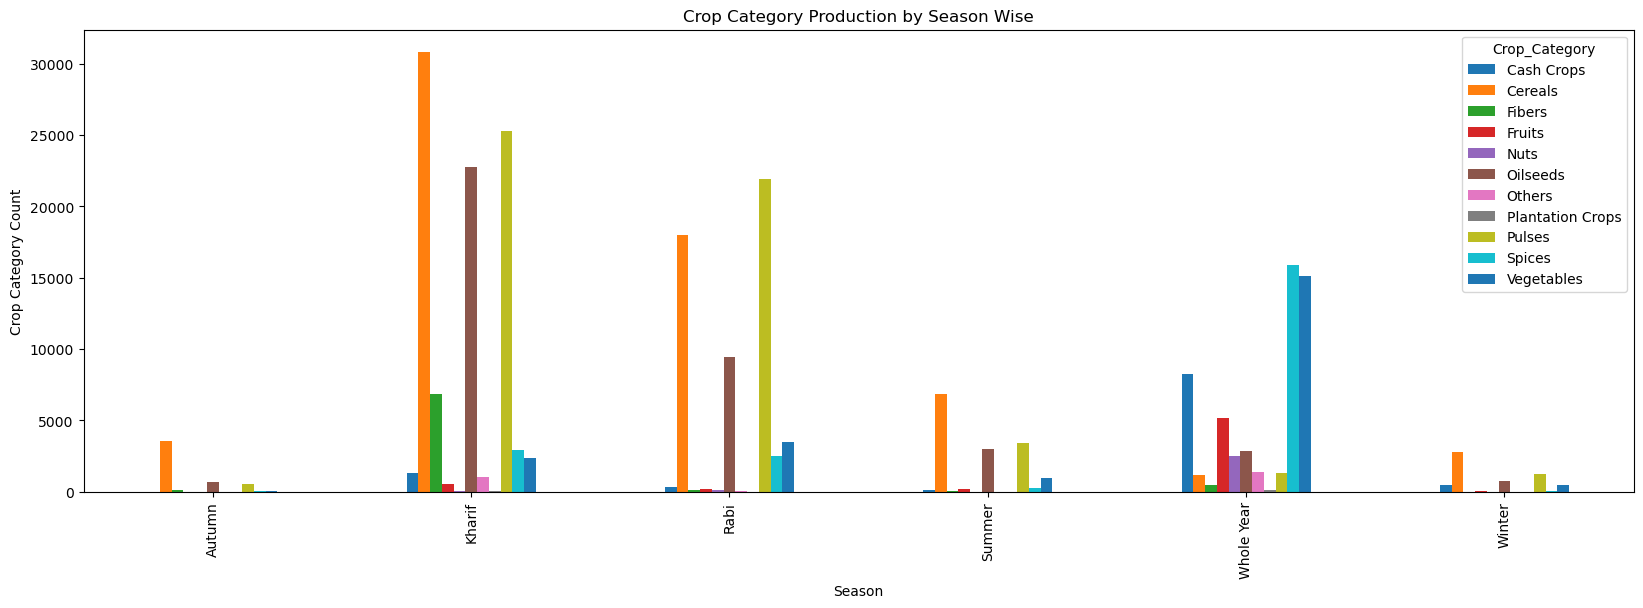

In [43]:
df_season.plot(kind='bar',stacked=False,figsize = (20,6))
plt.title('Crop Category Production by Season Wise')
plt.ylabel('Crop Category Count')

In <b>Autumn season </b> Production of Cereals is more and Nuts and Platation crops are almost zero production.<br>
In <b> Kharif season</b> Productin of Cereals and Pulses are most Produced compared other seasons.Least Production is Plantation crop<br>
In <b>Rabi season</b> Pulses production is more than Cereals and followed by Oilseed.<br>
In <b> Summer Season</b> Cereals production is low compared to Kharif and Rabi season.<br>
In <b> Whole Year</b> Vegetables and Spices are produced consistently throughout the year.<br>
In<b> Winter</b> There is very noticeable production of Cereals and Pulses.<br>


# 10. State-Wise Crop Diversification

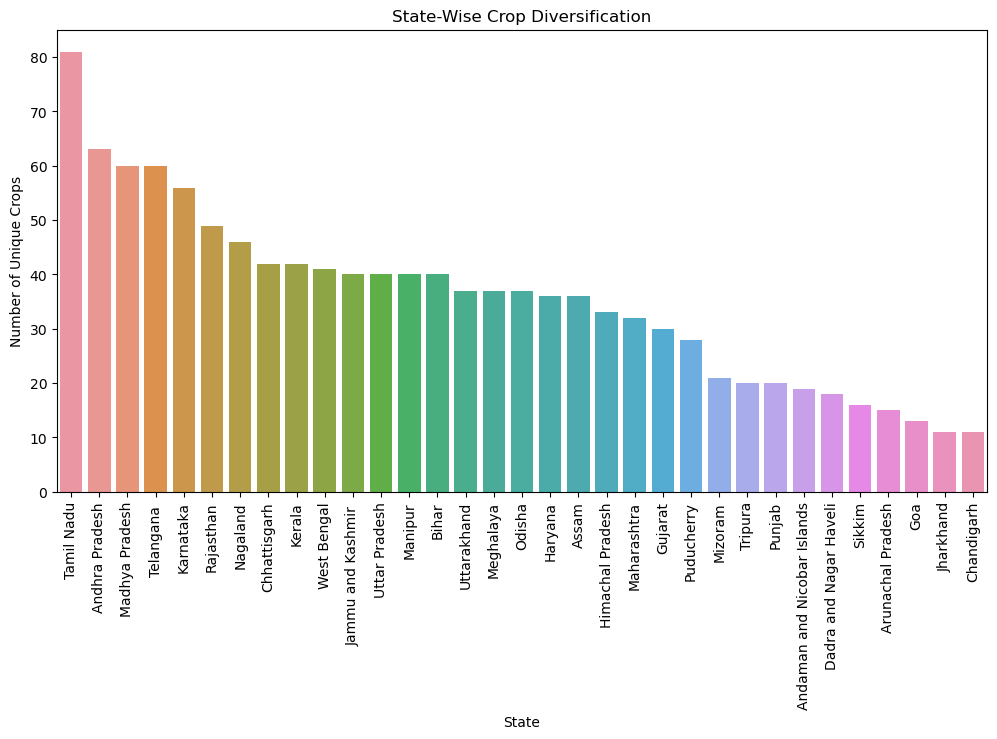

In [44]:
crop_diversity = df.groupby('State_Name')['Crop'].nunique().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=crop_diversity.index, y=crop_diversity.values)
plt.title('State-Wise Crop Diversification')
plt.xlabel('State')
plt.ylabel('Number of Unique Crops')
plt.xticks(rotation=90)
plt.show()




- Tamil Nadu is highest in producing unique crop of around 80 unique crops followed by Andhra Pradesh and Telangana.
- States like Goa, Chandigarh, and Jharkhand are at the lower end.

In [45]:
df.to_csv('Crop_Production',index=False)